In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


df= pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

    It looks like our data does not contain any missing values, except for our suspect column Unnamed: 32, which is full of missing values. Let's go ahead and remove this column entirely. After that, let's check for the data type of each column.

In [3]:
df.drop('Unnamed: 32', axis=1, inplace=True)

    id column can be dropped; it's just an identifier and doesn't help in prediction.

In [4]:
df.drop('id',axis=1,inplace=True)

    Our response variable, diagnosis, is categorical and has two classes, 'B' (Benign) and 'M' (Malignant). All explanatory variables are numerical, so we can skip data type conversion.

    Let's now take a closer look at our response variable, since it is the main focus of our analysis. We begin by checking out the distribution of its classes.

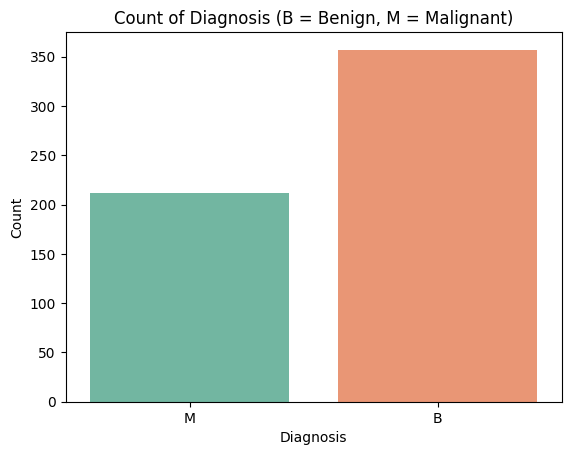

In [5]:
#Count of Malignant (M) vs Benign (B)
# Plot count of each class
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title("Count of Diagnosis (B = Benign, M = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


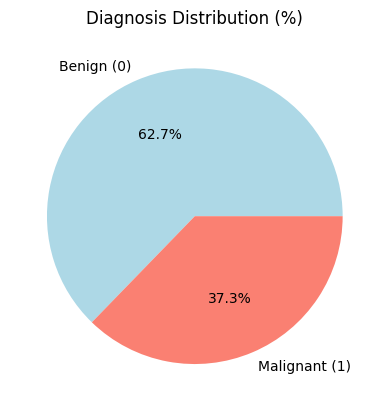

In [6]:
# Distribution in %
diagnosis_counts = df['diagnosis'].value_counts(normalize=True) * 100
print(diagnosis_counts)

# Optional pie chart
diagnosis_counts.plot(kind='pie', labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Diagnosis Distribution (%)")
plt.ylabel("")
plt.show()


    Out of the 569 observations, 357 (or 62.7%) have been labeled malignant, while the rest 212 (or 37.3%) have been labeled benign. Later when we develop a predictive model and test it on unseen data, we should expect to see a similar proportion of labels.

    Although our dataset has 30 columns excluding the id and the diagnosis columns, they are all in fact very closely related since they all contain information on the same 10 key attributes but only differ in terms of their perspectives (i.e., the mean, standard errors, and the mean of the three largest values denoted as "worst").

    In this sense, we could attempt to dig out some quick insights by analyzing the data in only one of the three perspectives. For instance, we could choose to check out the relationship between the 10 key attributes and the diagnosis variable by only choosing the "mean" columns.

    Let's quickly scan for any interesting patterns between our 10 "mean" columns and the response variable by generating a scatter plot matrix as shown below:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

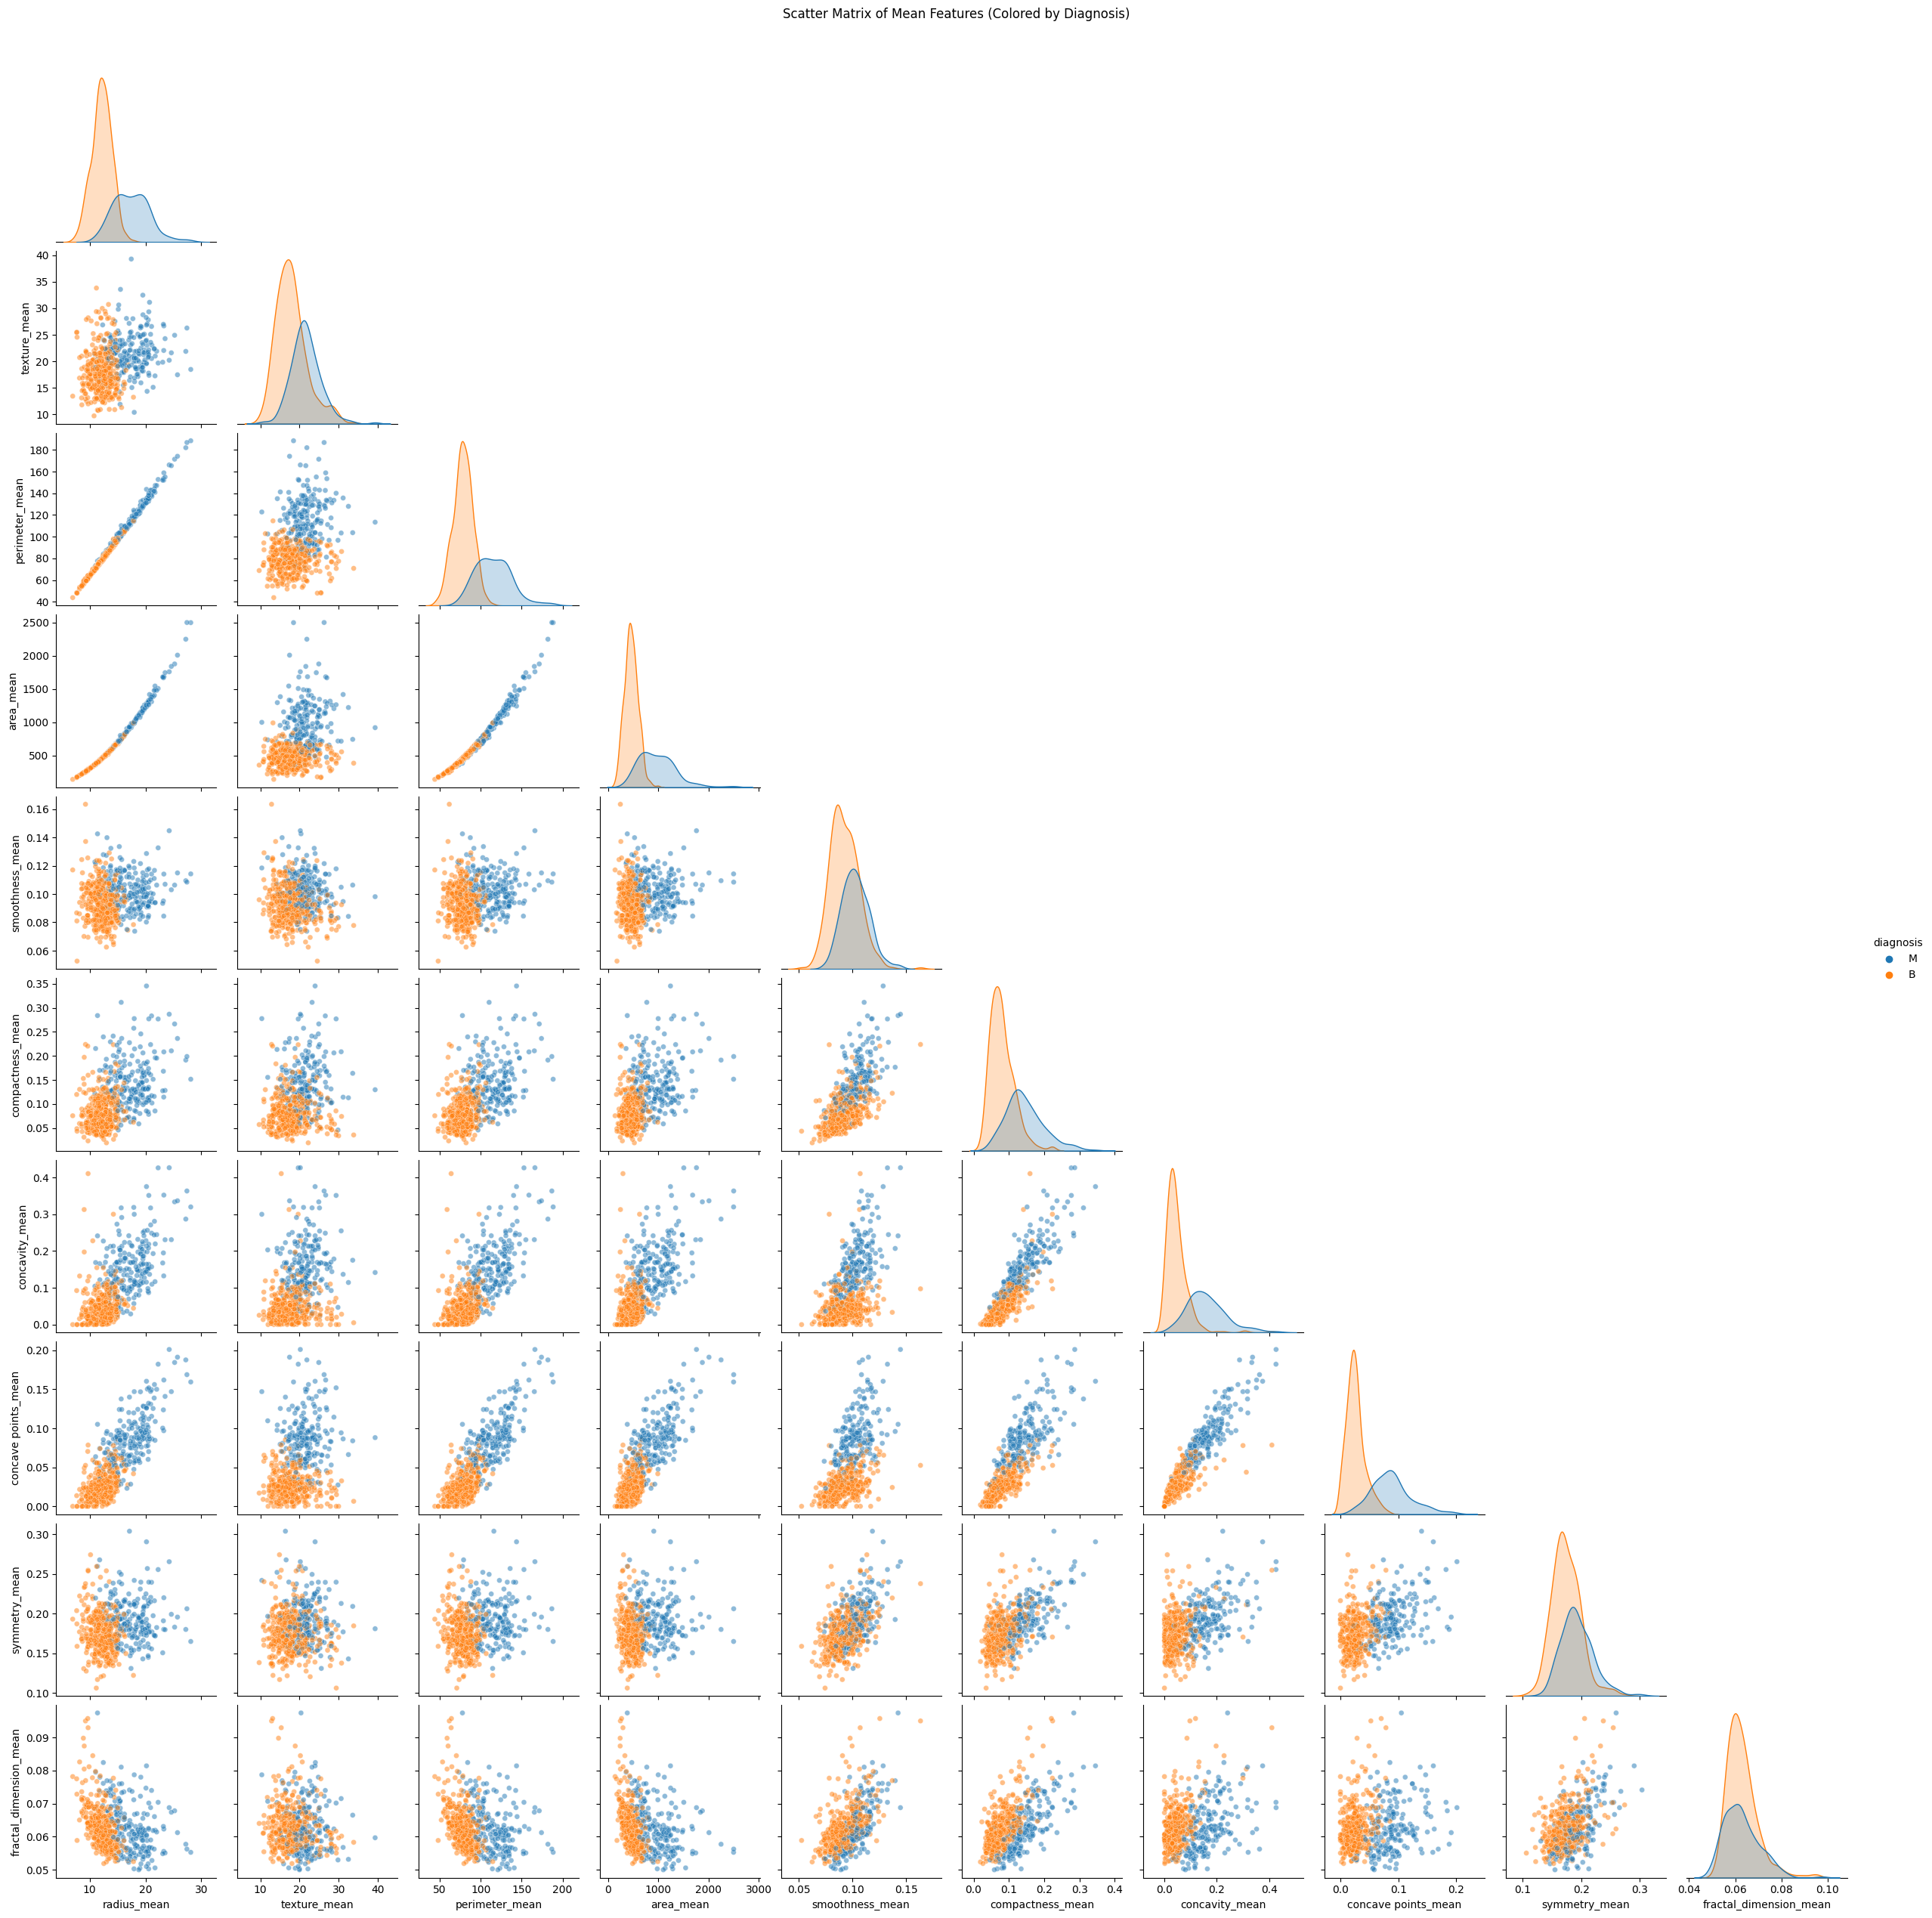

In [7]:
# Filter only mean columns + diagnosis
mean_cols = [col for col in df.columns if '_mean' in col]
df_mean = df[mean_cols + ['diagnosis']]

# Map diagnosis to colors if needed
# df_mean['diagnosis'] = df_mean['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

# Pairplot
sns.pairplot(df_mean, hue='diagnosis', corner=True, plot_kws={'alpha': 0.5, 's': 25})
plt.suptitle("Scatter Matrix of Mean Features (Colored by Diagnosis)", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

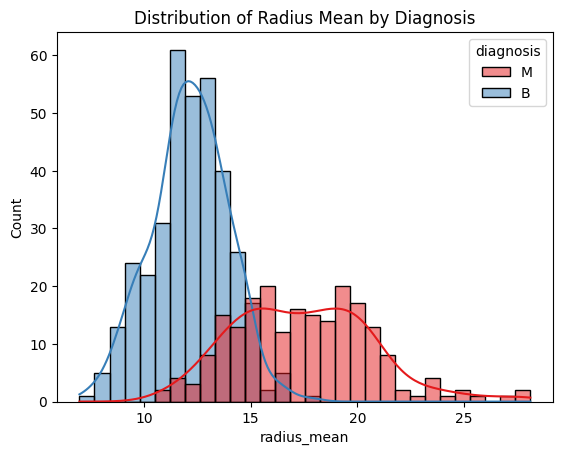

In [8]:
 # Distribution vs a Key Feature (like radius_mean)
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title("Distribution of Radius Mean by Diagnosis")
plt.show()

    ✅ radius_mean is very good at separating benign vs malignant.
    ✅ If a tumor's radius is small, it’s more likely to be benign.
    ✅ If a tumor’s radius is large, it’s more likely to be malignant.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

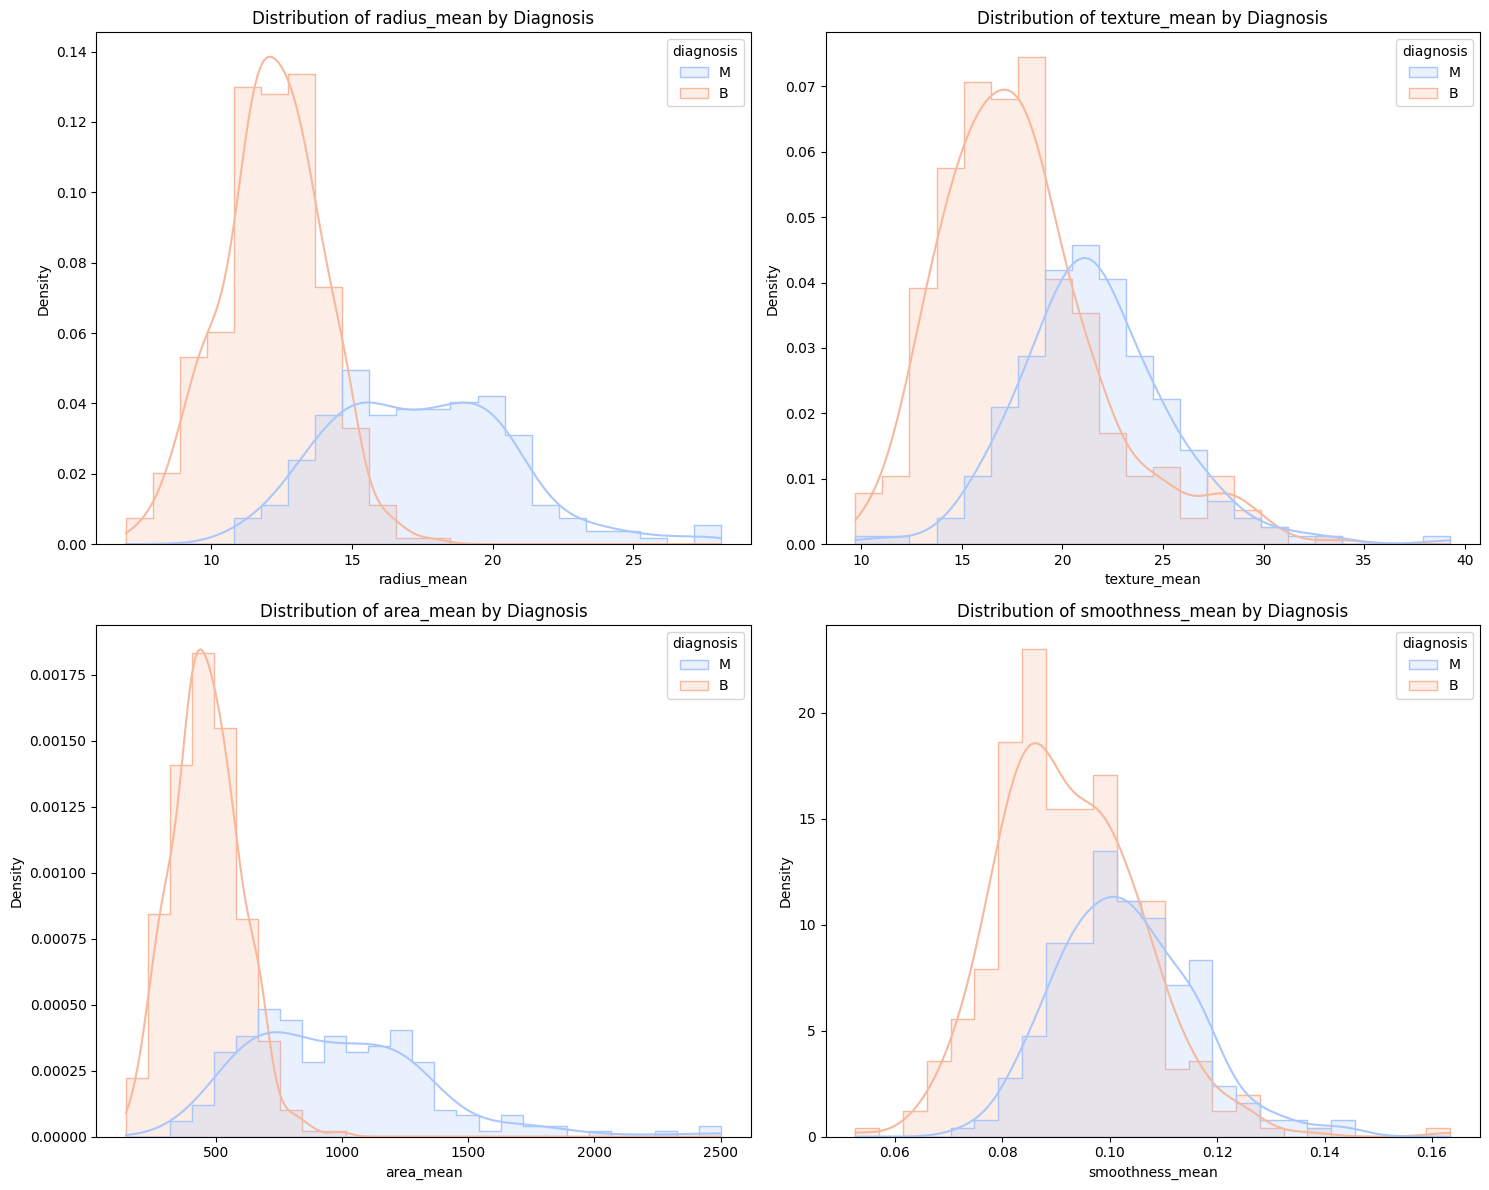

In [9]:
# List of features you want to check
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']

# Set the figure size
plt.figure(figsize=(15, 12))

# Loop over each feature
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)  # 2x2 grid
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette="coolwarm", element="step", stat="density")
    plt.title(f'Distribution of {feature} by Diagnosis')

plt.tight_layout()
plt.show()

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr().round(2)

# Create interactive heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    aspect='auto',
    title="Interactive Correlation Heatmap"
)

fig.update_layout(width=1000, height=800)
fig.show()

    There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the radius, perimeter and area attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

    Why is multicollinearity a problem?
> Redundancy: Repeating the same info doesn't help the model learn better—it just makes it more bloated.

> Misleading Coefficients: In models like logistic regression, which calculate coefficients, multicollinearity makes it hard to interpret which feature is truly important.

> Overfitting Risk: With too many similar features, the model might memorize instead of generalizing.

>Numerical Instability: For regression models, the math behind the scenes can get unstable if features are highly collinear.

    From the matrix some Strong correlations spotted:
    * radius_mean ~ perimeter_mean (0.99) → Very high

    * radius_mean ~ area_mean (0.99) → Very high

    * perimeter_mean ~ area_mean (0.99) → Very high

    * radius_mean ~ radius_worst (0.97) → Very high

    * Other *_worst features (texture_worst, perimeter_worst, area_worst, etc.) → Very high with their *_mean counterparts (>0.9).

    * compactness_mean ~ concavity_mean (0.88) and concavity_mean ~ concave points_mean (0.92) → Highly correlated.

    * compactness_mean ~ concave points_mean (0.86) → Strong correlation too.

#### Cleaning Strategy:

    ✅ Keep only radius features for size.

    ✅ Remove perimeter and area features (both mean and SE).

    ✅ Keep compactness for shape, remove related ones.

    ✅ Remove all worst columns (they are derived/redundant).

    ✅ Keep se (standard error) features only if they represent independent characteristics.


In [11]:
drop_columns = [
    'perimeter_mean', 'area_mean',
    'concavity_mean', 'concave points_mean',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
    'perimeter_se', 'area_se'  # <---- added these two now!
]

df = df.drop(drop_columns, axis=1)

In [12]:
# Create training, validation and test sets
train_val_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [13]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (341, 15)
val_df.shape : (114, 15)
test_df.shape : (114, 15)


In [14]:
input_cols=list(df.iloc[:, 1:])
print(input_cols)

['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


In [15]:
target_col='diagnosis'
target_col

'diagnosis'

In [16]:
# Create inputs and targets
train_inputs,train_targets=train_df[input_cols].copy(),train_df[target_col].copy()
val_inputs, val_targets=val_df[input_cols].copy(),val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

In [17]:
# Identify numeric and categorical columns
train_inputs.select_dtypes(include=np.number).columns.tolist()

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se']

    Looks like our data set contain only numeric value
    let's check the no. of missing values in each numeric column.

In [18]:
df[input_cols].isna().sum()

radius_mean               0
texture_mean              0
smoothness_mean           0
compactness_mean          0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
smoothness_se             0
compactness_se            0
concavity_se              0
concave points_se         0
symmetry_se               0
fractal_dimension_se      0
dtype: int64

    There is no missing value present in the dataset

In [19]:
df[input_cols]

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


    Only radius_mean and texture_mean seem large. Others like smoothness_mean, symmetry_mean are already small.

    BUT even if some features are already small, best practice is to scale ALL numeric features consistently.
    Reason:
✔️ Scaling puts everything on the same footing (like all features between -1 and 1 or 0 and 1).

✔️ It improves model convergence and coefficient interpretation.


    ✅ Standardize (scale) all features — not just radius_mean and texture_mean.(Even if others are small — scaling won’t hurt small features, but missing scaling can hurt big features.)

    👉 Use StandardScaler (mean = 0, std = 1) because it’s perfect for logistic regression.

In [20]:
# Scale numeric features
scaler=StandardScaler().fit(df[input_cols])
train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [21]:
train_inputs

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
217,-1.115407,-0.421117,-1.125857,-0.857952,0.556336,0.049955,-0.174946,1.279378,-0.787025,0.319792,0.856986,-0.176182,0.612379,0.309446
283,0.600039,-0.120926,0.728714,1.437641,0.235053,0.573051,-0.425425,-0.543493,-0.826026,0.521553,0.226339,0.047667,-0.806661,0.108216
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083
504,-1.380108,-1.493895,4.770911,2.265820,2.067826,4.567859,0.008763,-0.224713,0.914044,1.114541,0.097358,1.635700,0.590585,2.517299
251,-0.746188,-0.195392,-0.207111,-0.842033,0.081713,-0.490152,-0.045014,-0.678480,-0.220335,-0.828738,-0.644696,-0.425174,0.287889,-0.882802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.165497,0.535307,1.233989,0.609461,0.786345,0.677954,0.062901,-0.121295,-1.127372,0.171685,-0.204702,0.149859,-0.287234,0.118429
492,1.102744,0.295619,0.266139,0.465430,1.111279,-0.287435,1.261881,0.129084,0.318687,0.085056,0.181577,0.759768,1.020413,0.076065
418,-0.405371,-1.656790,-0.605638,-0.879367,-0.834674,-0.006749,-0.649196,-1.036269,-0.303339,-0.718077,-0.756601,-0.578300,-0.413156,0.234174
385,0.134256,0.930909,-0.678938,-0.719796,-0.674032,-1.224471,0.037998,0.744147,0.423691,-0.450366,0.066191,0.642977,-0.380465,-0.349468


In [22]:
x_train=train_inputs[input_cols]
x_val=val_inputs[input_cols]
x_test=test_inputs[input_cols] 

In [23]:
# Create and train the model

model=LogisticRegression(solver='liblinear')
model.fit(x_train,train_targets)

LogisticRegression(solver='liblinear')

In [24]:
weights=pd.DataFrame({'feature':input_cols,
                     'weight':model.coef_[0]})
weights

,feature,weight
0,radius_mean,2.743263
1,texture_mean,1.640030
2,smoothness_mean,0.857103
3,compactness_mean,1.367422
4,symmetry_mean,0.597417
5,fractal_dimension_mean,-0.057955
6,radius_se,1.168365
7,texture_se,-0.688974
8,smoothness_se,-0.025863
9,compactness_se,-0.236367


In [25]:
print(model.intercept_)

[-0.80168129]


In [26]:
top_weights = weights.sort_values(by='weight', ascending=False).iloc[::-1]

fig = px.bar(
    top_weights,
    x='weight',
    y='feature',
    orientation='h',
    color='weight',
    color_continuous_scale='Tealrose',
    title='🔝 Top 10 Important Features'
)

fig.update_layout(
    height=500,
    yaxis=dict(tickfont=dict(size=12)),
    xaxis_title='Weight',
    yaxis_title='Feature',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [27]:
# Helper function to predict, compute accuracy & plot confustion matrix
def predict_and_plot(inputs,targets,name):
    preds=model.predict(inputs)
    
    accuracy=accuracy_score(targets,preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf=confusion_matrix(targets,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 94.43%


array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

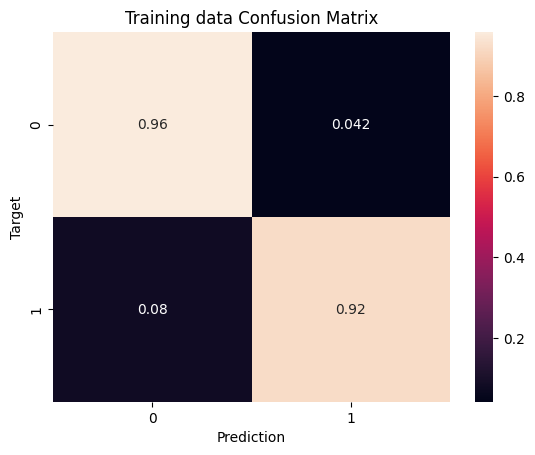

In [28]:
predict_and_plot(x_train,train_targets,'Training data')

Accuracy: 92.98%


array(['M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B'], dtype=object)

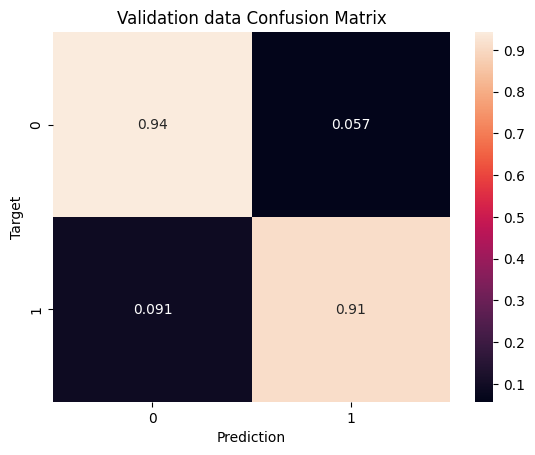

In [29]:
predict_and_plot(x_val,val_targets,'Validation data')

Accuracy: 95.61%


array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

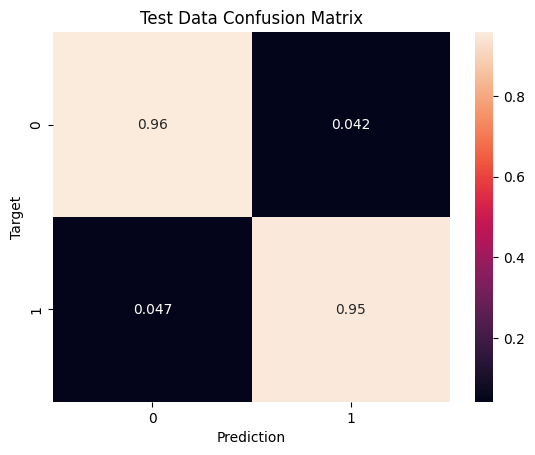

In [30]:
predict_and_plot(x_test,test_targets,'Test Data')

In [31]:
def random_guess(inputs):
    return np.random.choice(['M','B'],len(inputs))

In [32]:
def all_M(inputs):
    return np.full(len(inputs),'M')

In [33]:
accuracy_score(test_targets,random_guess(x_test))

0.5350877192982456

In [34]:
accuracy_score(test_targets,all_M(x_test))

0.37719298245614036

    Our random model achieves an accuracy of 42% and our "always M" model achieves an accuracy of 37%.

    Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.



In [35]:
#Let's define a helper function to make predictions for individual inputs.
def predict_input(single_input):
    input_new_df=pd.DataFrame([single_input])
    input_new_df[input_cols]=scaler.transform(input_new_df[input_cols])
    X_input=input_new_df[input_cols]
    pred=model.predict(X_input)[0]
    prob=model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred,prob

In [36]:
sample_data = {
    'radius_mean': 14.5,
    'texture_mean': 20.4,
    'smoothness_mean': 0.095,
    'compactness_mean': 0.07,
    'symmetry_mean': 0.18,
    'fractal_dimension_mean': 0.055,
    'radius_se': 0.5,
    'texture_se': 1.0,
    'smoothness_se': 0.006,
    'compactness_se': 0.025,
    'concavity_se': 0.03,
    'concave points_se': 0.01,
    'symmetry_se': 0.02,
    'fractal_dimension_se': 0.003
}

predict_input(sample_data)


('M', 0.5090326526988685)

## ✅ Interpretation of Sample Prediction

- **Prediction:** 'M' (Malignant)
- **Probability:** 0.509 (~51%)

---

### 🔥 What this means:
- The model is slightly leaning towards predicting Malignant.
- However, the probability is very close to 0.5, meaning the model is not very confident.
- This happens when the sample's feature values are borderline between classes.

---

### 🧠 Why probability close to 0.5 is normal:
- Some medical cases are genuinely difficult to classify.
- Logistic Regression outputs soft probabilities, and borderline samples naturally get around 50%.

---

### 🎯 How to understand model confidence:
| Probability Range | Interpretation            |
|:------------------|:---------------------------|
| > 0.9              | Very confident prediction  |
| 0.6 – 0.9          | Reasonably confident        |
| 0.5 – 0.6          | Borderline, not very confident |
| ~0.5               | Very uncertain, needs deeper review |

---

### 📢 Important Tip:
- By default, predictions use a **0.5 probability threshold**.
- In critical applications like healthcare, you might set a stricter threshold (e.g., 0.6 or 0.7) to reduce false positives.

### 🧡 Final Summary:
 - The model is working perfectly.
 - Our sample input is simply close to the decision boundary.
 - This realistic behavior shows the model is healthy and generalizing well.